Look into correlations between commodities and especially lithium prices and lithium mining companies and consumers. 

In [20]:
#Imports
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import pandas_datareader as web

Companies are: 
    Mining Companies: 
        Albemarle(NYSE:ALB)
        Livent(NYSE:LTHM)
        Sociedad Química y Minera(NYSE:SQM)
        FMC Corp(NYSE:FMC)
        Lithium Americas (NYSE: LAC)
    Battery Manufacturers: 
        Panasonic(OTC:PCRFY)
        BYD(OTC:BYDDY)
        LG Chem(KRX:051910)
        Samsung SDI(KRX:006400)
    EV Manufactuers:
        Tesla(NASDAQ:TSLA)
        Rivian(NASDAQ:RIVN)
        Nio(NASDAQ:NIO)
        Polestar(NASDAQ:PSNY)
        Xpeng(NYSE:XPEV)

In [21]:
start_date = '2021-01-01'
end_date = '2022-10-31'
mining_companies = ["ALB", "LTHM", "SQM", "FMC", "LAC"]
battery_man = ["PCRFY", "BYDDY", "051910.KS", "006400.KS"]
ev_man = ["TSLA", "RIVN", "NIO", "PSNY", "XPEV"]

In [22]:
miningData = web.DataReader(mining_companies, 'yahoo', start= start_date, end= end_date)

In [23]:
batteryData = web.DataReader(battery_man, 'yahoo', start= start_date, end= end_date)

In [24]:
evData = web.DataReader(ev_man, 'yahoo', start= start_date, end= end_date)

Clean up data to make it Adjusted Close

In [25]:
miningData = miningData['Adj Close']
batteryData = batteryData['Adj Close']
evData = evData['Adj Close']

Symbols,TSLA,RIVN,NIO,PSNY,XPEV
Date,,,,,
2021-11-10,355.983337,100.730003,39.549999,10.67,44.330002
2021-11-11,354.503326,122.989998,42.200001,11.06,47.580002
2021-11-12,344.473328,129.949997,42.669998,12.81,48.529999
2021-11-15,337.796661,149.360001,40.570000,14.78,47.500000
2021-11-16,351.576660,172.009995,40.669998,15.33,50.000000
...,...,...,...,...,...
2022-10-25,222.419998,34.490002,10.630000,4.58,7.940000
2022-10-26,224.639999,34.439999,10.810000,4.56,8.190000
2022-10-27,225.089996,34.500000,9.980000,4.19,7.360000


Change Data to percent changes to make ineferences possible

In [26]:
miningData = miningData.pct_change()
batteryData = batteryData.pct_change()
evData = evData.pct_change()

Plot Data to take a look

<AxesSubplot: xlabel='Date'>

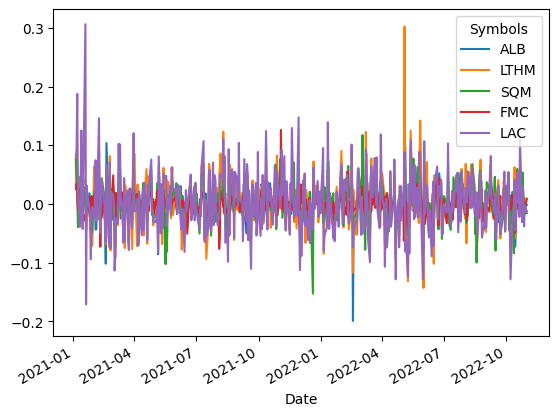

In [27]:
miningData.plot()

Lets make some correlation matrices

In [29]:
corrMining = miningData.corr()
corrMining.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_39158/1139021394.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrMining.style.background_gradient(cmap='coolwarm').set_precision(2)


Symbols,ALB,LTHM,SQM,FMC,LAC
Symbols,,,,,
ALB,1.00,0.77,0.67,0.41,0.65
LTHM,0.77,1.00,0.64,0.37,0.71
SQM,0.67,0.64,1.00,0.41,0.54
FMC,0.41,0.37,0.41,1.00,0.33
LAC,0.65,0.71,0.54,0.33,1.00


In [30]:
corrBat = batteryData.corr()
corrBat.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_39158/178429391.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrBat.style.background_gradient(cmap='coolwarm').set_precision(2)


Symbols,PCRFY,BYDDY,051910.KS,006400.KS
Symbols,,,,
PCRFY,1.00,0.28,0.07,0.14
BYDDY,0.28,1.00,0.08,0.16
051910.KS,0.07,0.08,1.00,0.52
006400.KS,0.14,0.16,0.52,1.00


In [31]:
corrEv = evData.corr()
corrEv.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_39158/2581040403.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrEv.style.background_gradient(cmap='coolwarm').set_precision(2)


Symbols,TSLA,RIVN,NIO,PSNY,XPEV
Symbols,,,,,
TSLA,1.00,0.54,0.62,0.28,0.54
RIVN,0.54,1.00,0.58,0.41,0.56
NIO,0.62,0.58,1.00,0.38,0.82
PSNY,0.28,0.41,0.38,1.00,0.34
XPEV,0.54,0.56,0.82,0.34,1.00


We could also try combining all of them into one matrix

In [33]:
combinedData = pd.concat([miningData,batteryData, evData], axis= 1)

In [34]:
corrAll = combinedData.corr()
corrAll.style.background_gradient(cmap='coolwarm').set_precision(2)

/tmp/ipykernel_39158/2085310888.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corrAll.style.background_gradient(cmap='coolwarm').set_precision(2)


Symbols,ALB,LTHM,SQM,FMC,LAC,PCRFY,BYDDY,051910.KS,006400.KS,TSLA,RIVN,NIO,PSNY,XPEV
Symbols,,,,,,,,,,,,,,
ALB,1.00,0.77,0.67,0.41,0.65,0.32,0.36,0.11,0.06,0.47,0.45,0.42,0.30,0.36
LTHM,0.77,1.00,0.64,0.37,0.71,0.31,0.38,0.06,0.05,0.50,0.45,0.46,0.26,0.41
SQM,0.67,0.64,1.00,0.41,0.54,0.34,0.35,0.10,0.13,0.38,0.35,0.36,0.22,0.28
FMC,0.41,0.37,0.41,1.00,0.33,0.28,0.19,0.04,0.02,0.29,0.23,0.22,0.20,0.14
LAC,0.65,0.71,0.54,0.33,1.00,0.32,0.41,0.07,0.10,0.52,0.52,0.50,0.25,0.47
PCRFY,0.32,0.31,0.34,0.28,0.32,1.00,0.28,0.07,0.14,0.28,0.33,0.26,0.23,0.22
BYDDY,0.36,0.38,0.35,0.19,0.41,0.28,1.00,0.08,0.16,0.46,0.42,0.67,0.22,0.68
051910.KS,0.11,0.06,0.10,0.04,0.07,0.07,0.08,1.00,0.52,0.04,0.09,0.06,0.09,0.04
006400.KS,0.06,0.05,0.13,0.02,0.10,0.14,0.16,0.52,1.00,0.07,0.08,0.07,0.01,0.11
